Предоставлен датасет от интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>План исследовательского анализа данных</b>

- Узнать сколько игр выпускались в разные годы

- Сделать анализ продаж по платформам, найти платформы с самыми большими продажами, построить распределение по годам. Определить жизненный цикл игровых платформ.

- Отсеить для анализа данные за последние четыре года, для прогноза на 2017 год.

- Определить лидирующие платформы, визуализировать количетсво продаж лидирующих платформ

- Определить есть ли зависимость между отзывами клиентов и критиков на продажи. Построить диаграмму рассеивания между отзывами и продажами. Сделать вывод по полученным результатам. 

- Сравнить данные между разными платформами.

- Определить и визуализировать лучшие игровые жанры. 

<b>План по составлению портрета пользователя для каждого региона (NA, EU, JP)</b>

- Самые популярные платформы (топ-5). Описать различия в долях продаж.

- Самые популярные жанры (топ-5). Выявить разницу.

- Определить влияет ли рейтинг ESRB на продажи в отдельном регионе.

<b>Проверка гипотез</b>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b> Описание данных в столбцах</b>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<b>Описание аббревиатура ESRB</b>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
games_data_set = pd.read_csv('stat_analysis_project/games.csv')

<b>Подготовка данных для анализа</b>

In [3]:
display(games_data_set.head(5))
display(games_data_set.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

<b>Проверка на наличие дубликатов</b>

- Цель выявить и удалить дубликаты

In [4]:
duplicate_count_total=games_data_set.duplicated(subset=['Name', 'Platform', 'Year_of_Release', 
                                  'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 
                                  'Other_sales', 'Critic_Score', 'User_Score', 'Rating']).sum()
print(f"Количество дубликатов во всем файле: {duplicate_count_total}")

duplicate_count = games_data_set.duplicated(subset=['Name', 'Platform', 'Year_of_Release']).sum()
print(f"Количество неявных по имени, платформе и году релиза одновременно: {duplicate_count}")

Количество дубликатов во всем файле: 0
Количество неявных по имени, платформе и году релиза одновременно: 2


<b>Обработка дубликатов</b>

Данные не содержат явных дубликатов, а количество неявных дубликатов всего 2 записи, решено их удалить.

In [5]:
games_data_set = games_data_set.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'])

duplicate_count_after = games_data_set.duplicated(subset=['Name', 'Platform', 'Year_of_Release']).sum()
print(f"Осталось дубликатов после удаления: {duplicate_count_after}")

Осталось дубликатов после удаления: 0


<b>Обработка данных</b>

- Цель Перевести все столбцы в нижний регистр

In [6]:
games_data_set.columns = games_data_set.columns.str.lower()
display(games_data_set.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Решено все столбцы вывести в нижний регистр для удобста расчетов. 

In [7]:
games_data_set['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
games_data_set['user_score'] = games_data_set['user_score'].replace('tbd', np.nan)

In [9]:
games_data_set['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [10]:
games_data_set['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
games_data_set['rating'] = games_data_set['rating'].fillna('unknown')
games_data_set['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В столбце user_score найдены строковые значения ('tbd'), для расчетов они были заменены на NaN для удобста рассчетов. 

Также в столбце rating были заменены NaN на unknown для более точного анализа данных. Остальные столбцы не требовали каких либо изменений.

<b>обработка данных</b>

- Добавить столбец с общей суммой продаж 

In [12]:
games_data_set['total_sales'] = games_data_set[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_data_set['user_score'] = games_data_set['user_score'].astype('float')
display(games_data_set.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [13]:
print(games_data_set.isna().sum())

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
total_sales           0
dtype: int64


<b>Причины наличия пропусков</b>

Столбец user_score наличие пропусков в данном столбце вероятно связано со старыми играми, когда не было сервиса оценки игр или их сбора. Соответственно нет смысла к заполнению данных медианой или средним заполним (минус 1). По аналогичным причинам заполним столбец critic_score таким же значением.

Столбец year_of_release имеет всего 269 пропусков, заполнить их "заглушкой" не получиться, незначитльные пропуски никак не повлияют на исследование.

<b>обработка данных</b>

- Удаление пропусков, решено вместо NaN поставить -1

In [14]:
games_data_set['critic_score'] = games_data_set['critic_score'].fillna(-1)
games_data_set['user_score'] = games_data_set['user_score'].fillna(-1)
print(games_data_set.isna().sum())

name                 1
platform             0
year_of_release    269
genre                1
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
total_sales          0
dtype: int64


In [15]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games_data_set.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во NaN 1 , процент 

<b>Исследовательский анализ данных</b>

- Узнать сколько игр выпускались в разные годы

- Сделать анализ продаж по платформам, найти платформы с самыми большими продажами, построить распределение по годам. Определить жизненный цикл игровых платформ.

- Отсеить для анализа данные за последние четыре года, для прогноза на 2017 год.

- Определить лидирующие платформы, визуализировать количетсво продаж лидирующих платформ

- Определить есть ли зависимость между отзывами клиентов и критиков на продажи. Построить диаграмму рассеивания между отзывами и продажами. Сделать вывод по полученным результатам. 

- Сравнить данные между разными платформами.

- Определить и визуализировать лучшие игровые жанры. 

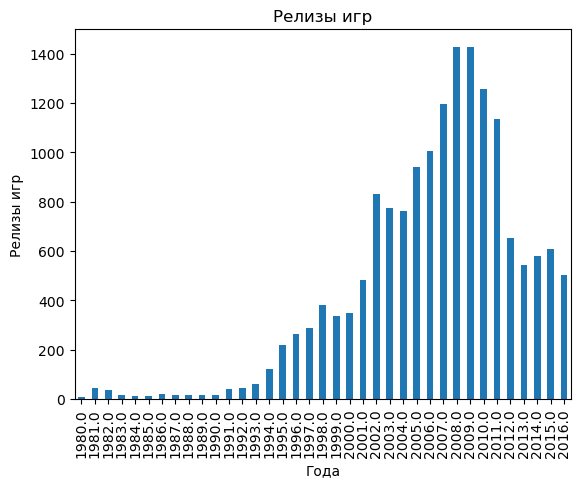

In [16]:
grouped = games_data_set.groupby('year_of_release')['name'].count().plot(kind='bar')
games_data_set['year_of_release'].value_counts().sort_index().plot(kind='bar')

plt.title('Релизы игр')
plt.xlabel('Года')
plt.ylabel('Релизы игр')
plt.show()

Анализ данные показал что на платформе игры начали регистрироваться с 1980 по 2016 год. Пик регистраций пришелся на 2008-2009 год когда было выпущено по 1400 игр, затем пошел спад релизов. Данных слишком много, следует провести анализ за 5 последних лет



          total_sales  name
platform                   
PS2           1255.77  2161
X360           971.42  1262
PS3            939.64  1330
Wii            907.51  1320
DS             806.12  2151
PS             730.86  1197
GBA            317.85   822
PS4            314.14   392
PSP            294.05  1209
PC             259.52   974


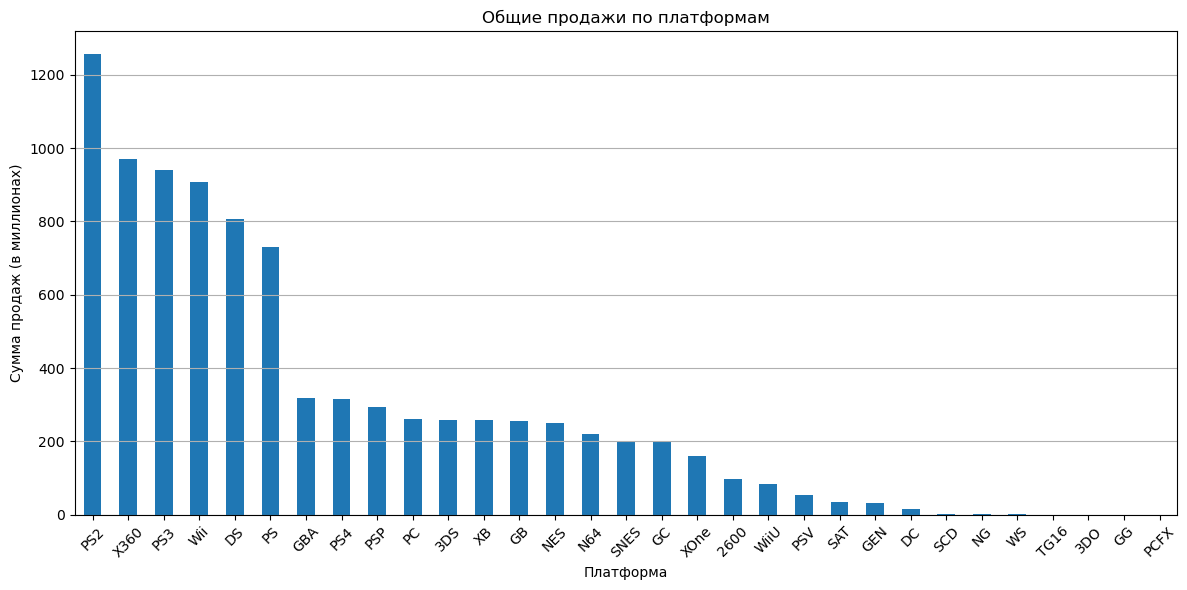

In [17]:
top_platforms_by_revenue = games_data_set.groupby('platform').agg({
    'total_sales': 'sum',
    'name': 'count'  # количество игр, если столбец 'name' — название игры
}).sort_values(by='total_sales', ascending=False)
print(top_platforms_by_revenue.head(10))

platform_sales = games_data_set.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# Строим гистограмму
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')

# Настройка графика
plt.title('Общие продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж (в миллионах)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Гистограмма показывает долю продаж по платформам. Самыми популярными платформами являются DS, PS2, PS3, Wii, X360, PS. 

<b>Исследовательский анализ данных</b>

- Вывести гистограмму с топовыми платформами

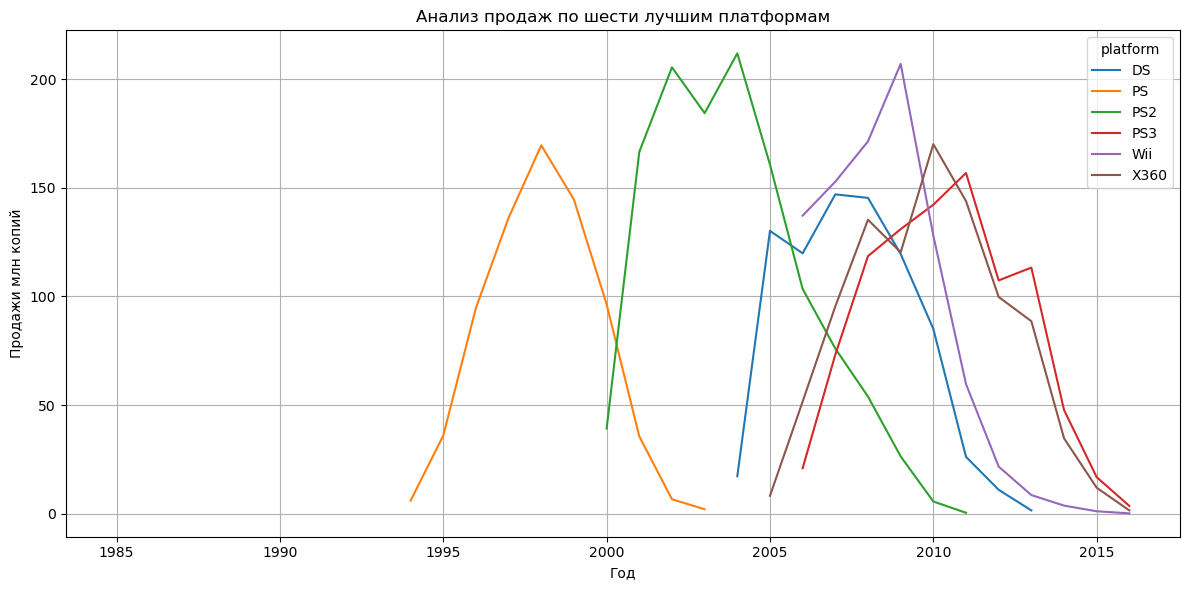

Медианное значение жизненного цикла игровой платформы: 11.5


In [18]:
# Топ-6 платформ по суммарным продажам
top_platforms = games_data_set.groupby('platform')['total_sales'].sum().nlargest(6)

# Фильтрация данных по этим платформам
top_data = games_data_set[games_data_set['platform'].isin(top_platforms.index)]

# Продажи по годам для каждой платформы
sales_by_year = top_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# График продаж по годам
sales_by_year.plot(kind='line', figsize=(12, 6), title='Анализ продаж по шести лучшим платформам')
plt.xlabel('Год')
plt.ylabel('Продажи млн копий')
plt.grid(True)
plt.tight_layout()
plt.show()

# Срок жизни платформ (период активности по годам)
lifespans = top_data.groupby('platform')['year_of_release'].agg(['min', 'max'])
lifespans['lifespan'] = lifespans['max'] - lifespans['min']+1

print(f"Медианное значение жизненного цикла игровой платформы: {lifespans['lifespan'].median()}")

Полученный график показал что шесть самых популярных игровых (DS, PS2, PS3, Wii, X360, PS) платформ имели достаточно быстрый рост популярности в первый-второй год, в последующем, достигнув пика, рост сменялся стагнацией и не менее быстрым падением популярности игровой платформы с точки зрения релизов игр. Игровые платформы в целом устаревали в течении 11.5 лет.

- Исходя из данных, в анализ следует включит записи с 2012 по 2016 год, так как только в этот период замечен значительный рост популярности игр. 

In [19]:
# Комментарий ревьюера
temp = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
temp.columns = temp.columns.str.lower()
temp.year_of_release = temp.year_of_release.astype('Int64')

time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

<b>Фильтрация данных по годам, для более точного анализа</b>

- Решено что данные раньше 2012 года стоит отсечь из анализа из за особенности индустрии.

In [20]:
games_data_set['year_of_release'] = pd.to_datetime(games_data_set['year_of_release'], format='%Y', errors='coerce')
filtered_data_by_years = games_data_set[
    (games_data_set['year_of_release'].dt.year >= 2012) &
    (games_data_set['year_of_release'].dt.year <= 2016)
].copy()

print(filtered_data_by_years['year_of_release'].dt.year.unique())

[2013 2015 2012 2014 2016]


Была проведена фильтрация датасета с целью исключения записей раньше 2012 года.

<b>Исследовательский анализ</b>

- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

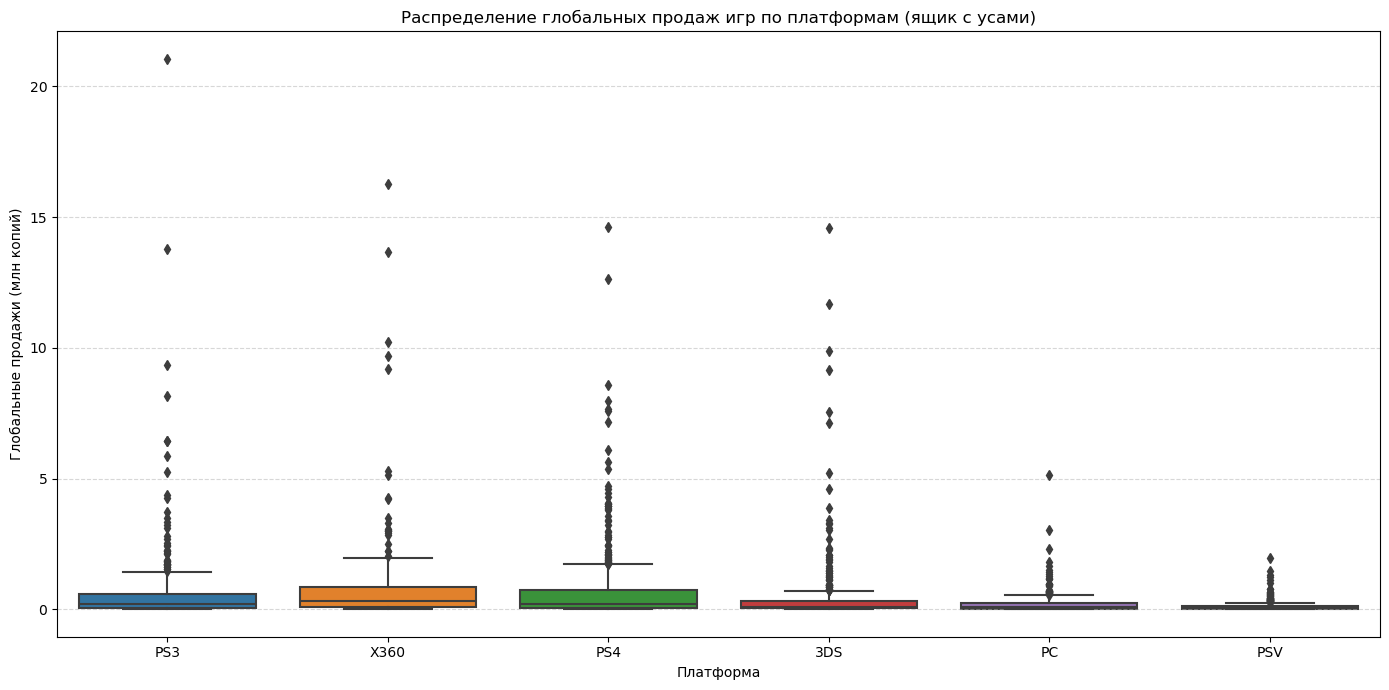

In [21]:
nonzero_sales = filtered_data_by_years[filtered_data_by_years['total_sales'] > 0]

top_platforms_by_count = nonzero_sales['platform'].value_counts().head(6).index
filtered_data = nonzero_sales[nonzero_sales['platform'].isin(top_platforms_by_count)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Распределение глобальных продаж игр по платформам (ящик с усами)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

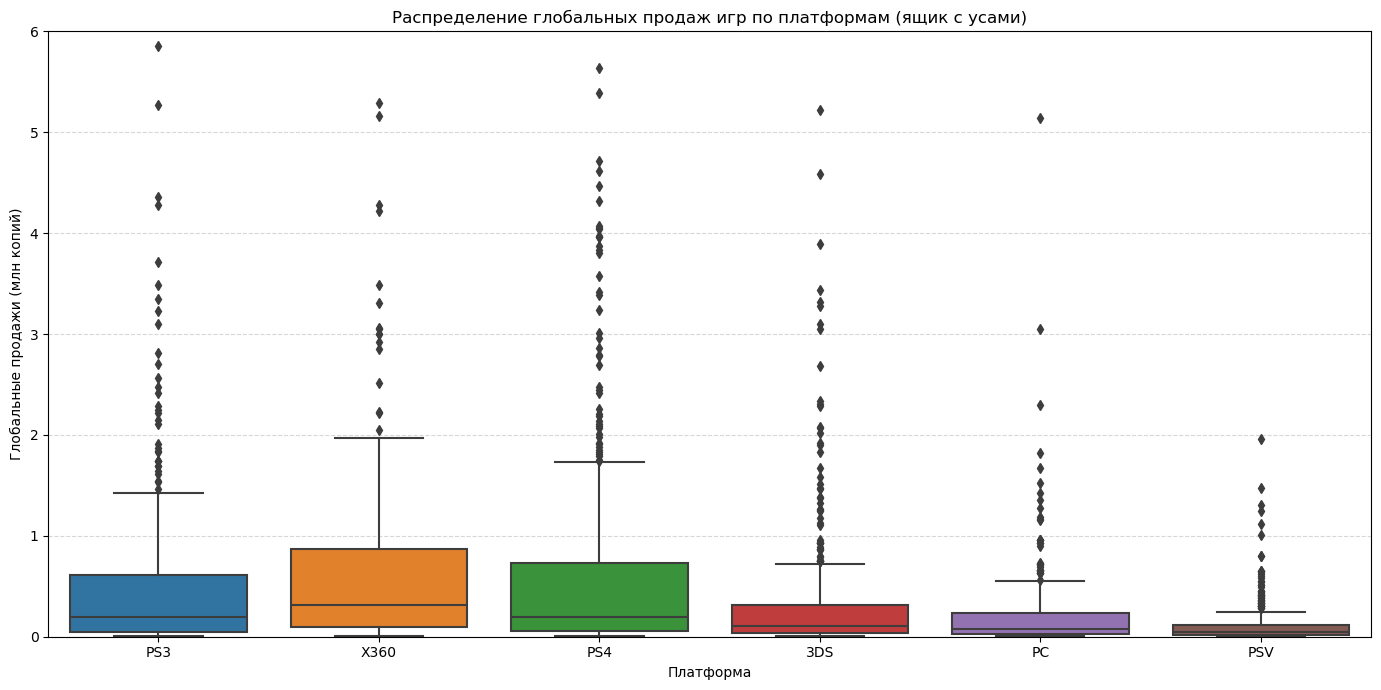

In [22]:
nonzero_sales = filtered_data_by_years[filtered_data_by_years['total_sales'] > 0]

top_platforms_by_count = nonzero_sales['platform'].value_counts().head(6).index
filtered_data = nonzero_sales[nonzero_sales['platform'].isin(top_platforms_by_count)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Распределение глобальных продаж игр по платформам (ящик с усами)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 6) 
plt.show()

Хитовые игры (blockbusters) чаще появляются на PS4, PS3 и X360 — эти платформы стоит рассматривать в первую очередь при анализе успешных проектов.

Основная масса игр продаётся в небольших объёмах на всех платформах — важно не только сделать игру, но и продвигать её.

PC и PSV можно считать платформами с более скромными показателями, возможно, из-за различий в аудитории или бизнес-моделях.

<b>Исследовательский анализ данных</b>

- Диаграмма рассеивания показывающая взаимосвязь между продажами в разных платформах и оценками критиков. 

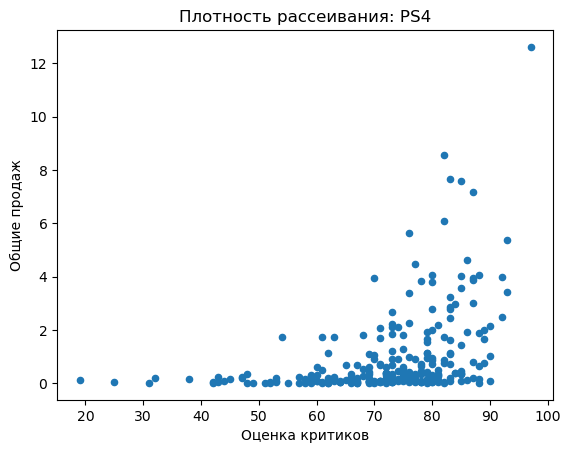

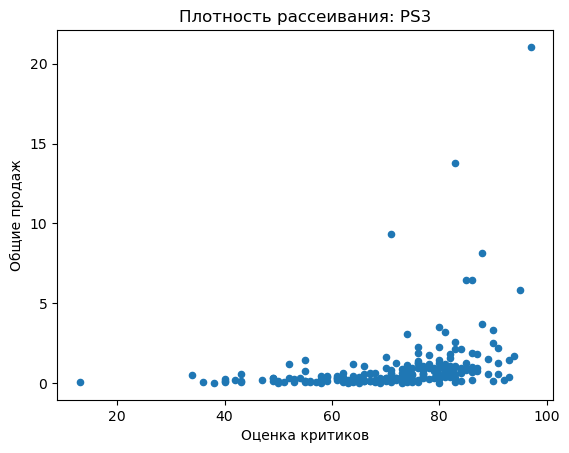

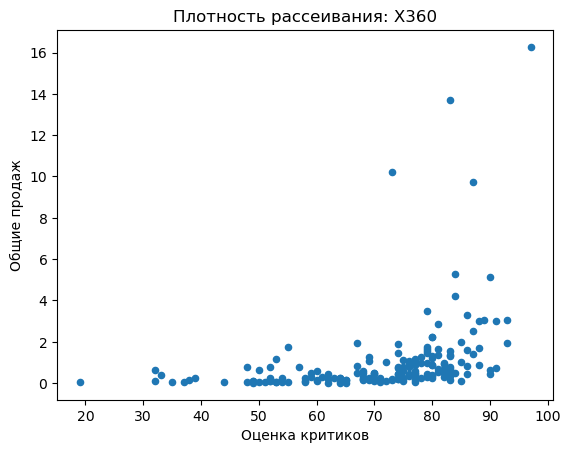

In [23]:
def plot_scatter_for_platform(data, platform_name):
 
    platform_data = data[data['platform'] == platform_name].copy()
    platform_data['critic_score'] = pd.to_numeric(platform_data['critic_score'], errors='coerce')
    platform_data['total_sales'] = pd.to_numeric(platform_data['total_sales'], errors='coerce')
    platform_data = platform_data[(platform_data['critic_score'] >= 0) & (platform_data['total_sales'] >= 0)]
    platform_data.plot.scatter(x='critic_score', y='total_sales')
    plt.title(f'Плотность рассеивания: {platform_name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Общие продаж')
    plt.show()

platforms = ['PS4', 'PS3', 'X360']

for platform in platforms:
    plot_scatter_for_platform(filtered_data_by_years, platform)

Заметно наличие прямой взаимосвязи между оценками критиков и продажами копий в игровых платформах (PS4, PS3, X360). Тем не менее большинство игр даже при высокий оценках от критиков имеют незначительные шансы выделиться от массы других игр по продажам, отсутствие механизмов продвижения игры может быть одна из причин. Диаграмма рассеивания показала наличие игр которые ушли далеко вперед по прибыльности от основной массы, видимо это хитовые игры которые очень популярны.

<b>Исследовательский анализ данных</b>

- Диаграмма рассеивания показывающая взаимосвязь между продажами в разных платформах и оценками пользователей. 

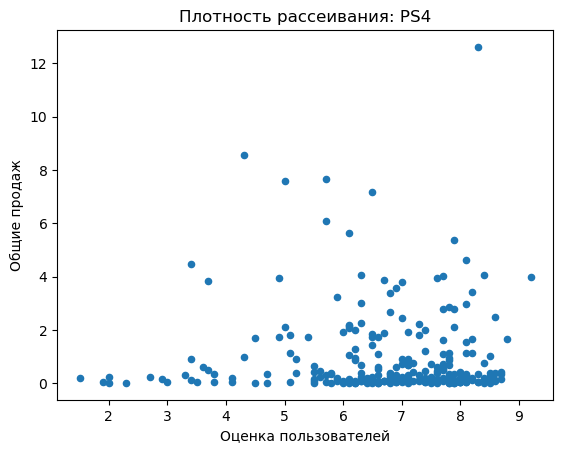

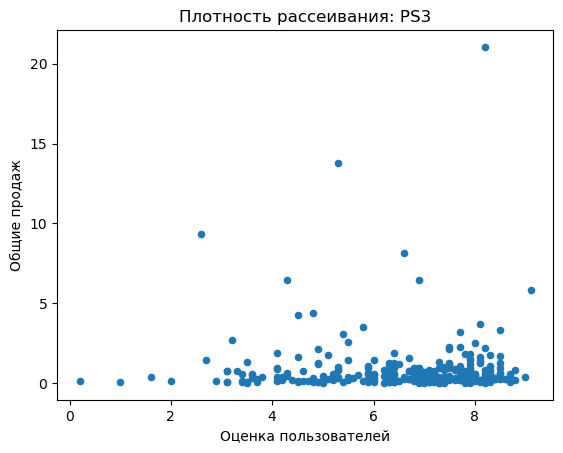

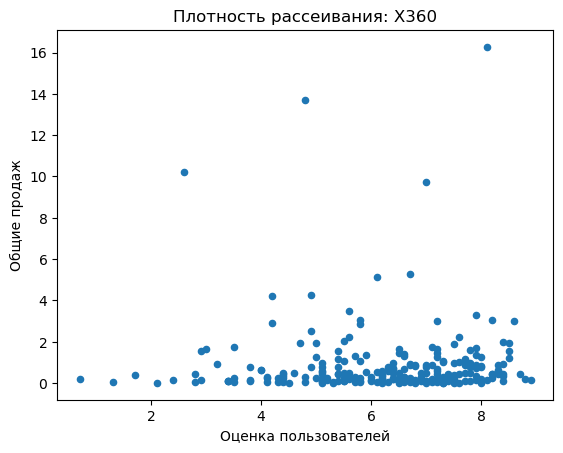

In [24]:
def plot_scatter_for_platform(data, platform_name):
 
    platform_data = data[data['platform'] == platform_name].copy()
    platform_data['user_score'] = pd.to_numeric(platform_data['user_score'], errors='coerce')
    platform_data['total_sales'] = pd.to_numeric(platform_data['total_sales'], errors='coerce')
    platform_data = platform_data[(platform_data['user_score'] >= 0) & (platform_data['total_sales'] >= 0)]
    platform_data.plot.scatter(x='user_score', y='total_sales')
    plt.title(f'Плотность рассеивания: {platform_name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Общие продаж')
    plt.show()

platforms = ['PS4', 'PS3', 'X360']

for platform in platforms:
    plot_scatter_for_platform(filtered_data_by_years, platform)

Оценками от пользователей, не так сильно влияет на итоговые продажи. Есть много игр которые получили "средние" баллы от пользователей, но при этом хорошо продаются.

<b>Исследовательский анализ данных</b>

- Коррелиационная матрица показывающая наличие взаимосвязей между оценками критиков, оценками пользователей и продажами.

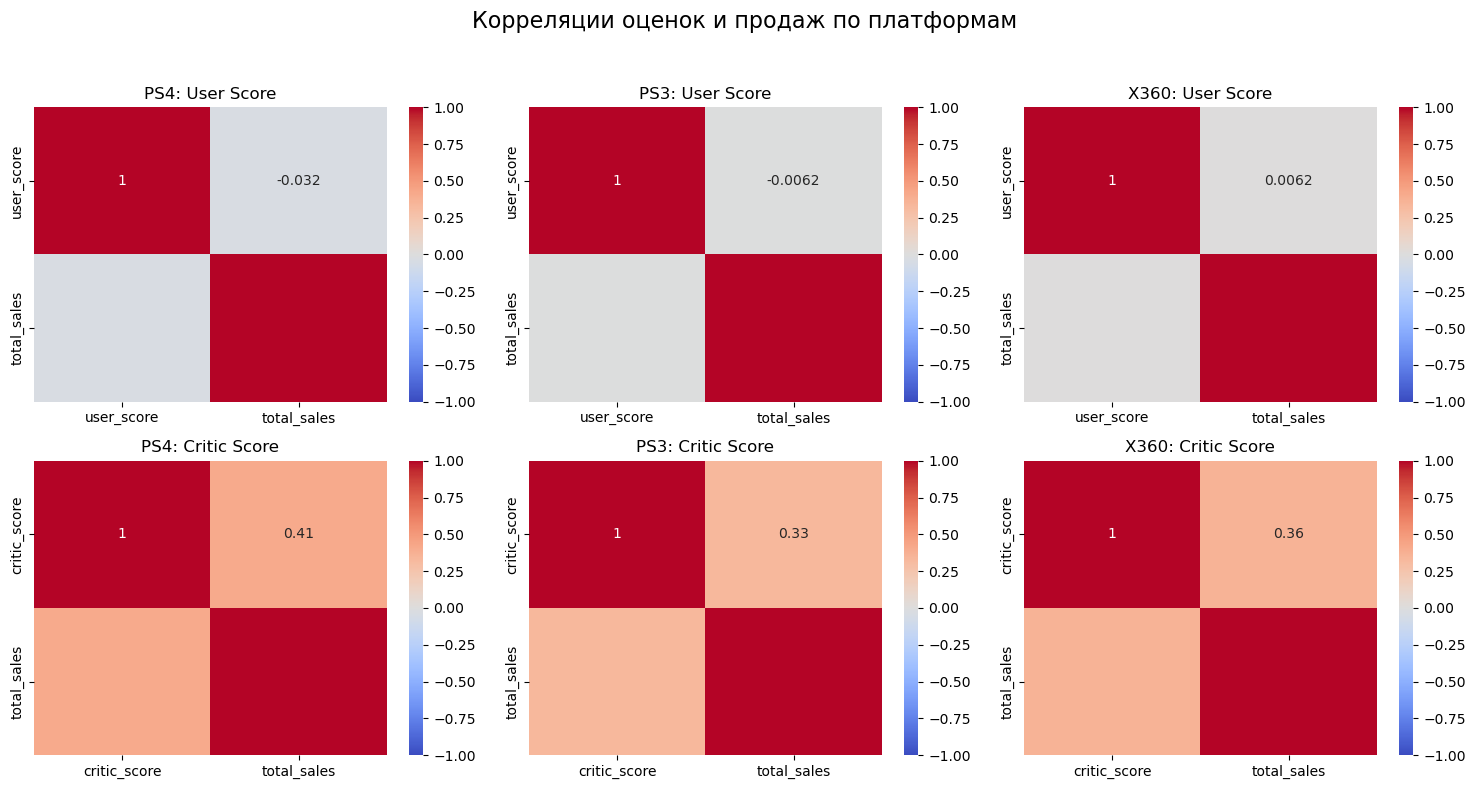

In [25]:
platforms = ['PS4', 'PS3', 'X360']

fig, axes = plt.subplots(nrows=2, ncols=len(platforms), figsize=(5 * len(platforms), 8))

for idx, platform in enumerate(platforms):
    platform_data_user = filtered_data_by_years[filtered_data_by_years['platform'] == platform].copy()
    platform_data_user['user_score'] = pd.to_numeric(platform_data_user['user_score'], errors='coerce')
    platform_data_user['total_sales'] = pd.to_numeric(platform_data_user['total_sales'], errors='coerce')
    platform_data_user = platform_data_user[platform_data_user['user_score'] != -1]
    corr_data_user = platform_data_user[['user_score', 'total_sales']].dropna()

    ax_user = axes[0, idx]
    if not corr_data_user.empty:
        sns.heatmap(corr_data_user.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax_user)
        ax_user.set_title(f'{platform}: User Score')
    else:
        ax_user.set_visible(False)

    platform_data_critic = filtered_data_by_years[filtered_data_by_years['platform'] == platform].copy()
    platform_data_critic['critic_score'] = pd.to_numeric(platform_data_critic['critic_score'], errors='coerce')
    platform_data_critic['total_sales'] = pd.to_numeric(platform_data_critic['total_sales'], errors='coerce')
    platform_data_critic = platform_data_critic[platform_data_critic['critic_score'] != -1]
    corr_data_critic = platform_data_critic[['critic_score', 'total_sales']].dropna()

    ax_critic = axes[1, idx]
    if not corr_data_critic.empty:
        sns.heatmap(corr_data_critic.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax_critic)
        ax_critic.set_title(f'{platform}: Critic Score')
    else:
        ax_critic.set_visible(False)

plt.suptitle('Корреляции оценок и продаж по платформам', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [26]:
# Комментарий ревьюера 2
platform_data_user['user_score'].min(), platform_data_critic['critic_score'].min()

(0.7, 19.0)

- Продажи слабо зависят от оценок, особенно от пользовательских.

- Оценка кртиков видимо оказывает положительный эффект на продажи игр.

- Это может указывать на то, что маркетинг, бренд, платформа или другие внешние факторы оказывают большее влияние на продажи, чем отзывы.

<b>Исследовательский анализ данных</b>

- Общее распределение игр по жанрам. 

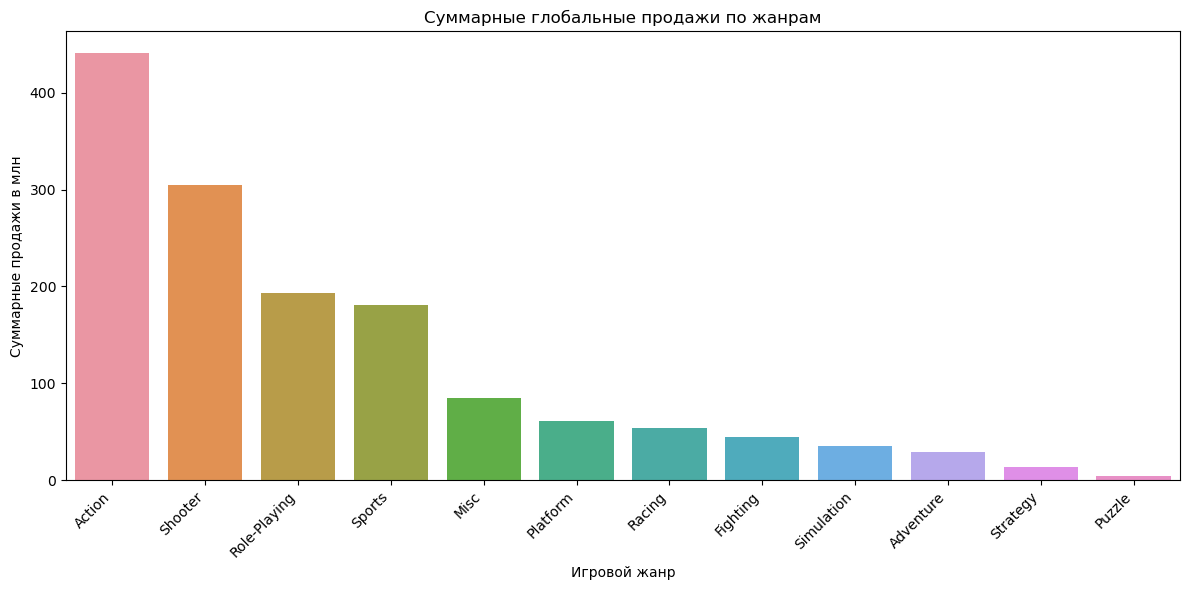

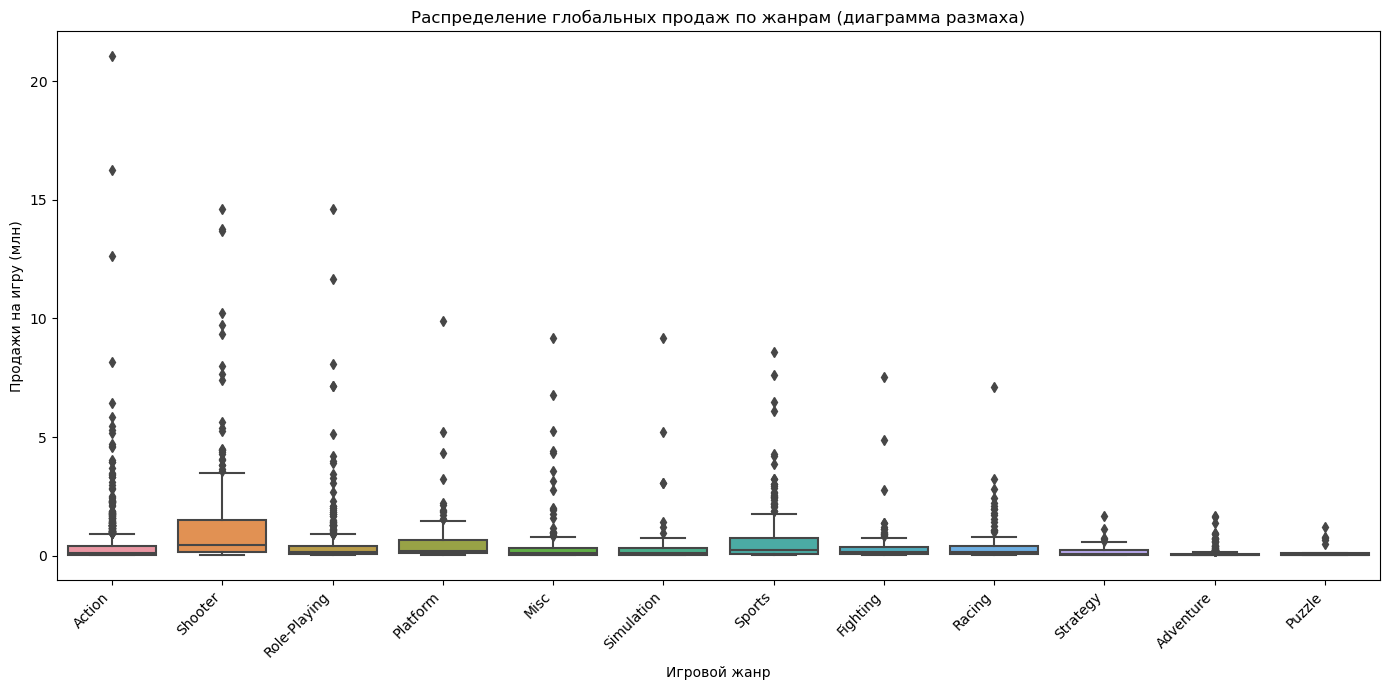

In [27]:
top_games_by_genre = filtered_data_by_years.groupby('genre').agg({
    'total_sales': 'sum',
    'name': 'count'
}).sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_games_by_genre.index, y='total_sales', data=top_games_by_genre)
plt.xticks(rotation=45, ha='right')
plt.title('Суммарные глобальные продажи по жанрам')
plt.ylabel('Суммарные продажи в млн')
plt.xlabel('Игровой жанр')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_data_by_years, x='genre', y='total_sales')
plt.xticks(rotation=45, ha='right')
plt.title('Распределение глобальных продаж по жанрам (диаграмма размаха)')
plt.ylabel('Продажи на игру (млн)')
plt.xlabel('Игровой жанр')
plt.tight_layout()
plt.show()

- Самые продаваемые жанры (по выбросам и разбросу):
Shooter, Sports, Platform, Action:

У этих жанров множество игр с продажами выше 5–10 млн копий. Особенно у жанра Shooter — широкий размах и большое количество "хитов".
Action — самый массовый по количеству игр, но большинство из них с низкими продажами. Видимо жанр сильно перенасыщен играми

- Высокие медианы у Shooter и Sports:
Средние продажи (медиана) выше у Shooter и Sports, чем у остальных. Это говорит о стабильной популярности этих жанров.

- Малоприбыльные жанры:
Puzzle, Adventure, Strategy, Simulation:

Медианные и максимальные значения продаж — самые низкие. Выбросов мало, и разброс небольшой → редко бывают хиты.
Эти жанры, скорее всего, нишевые, с ограниченной аудиторией.

- Высокая вариативность:
Жанры вроде Misc и Platform показывают, что у них очень разбросанные продажи — есть и провальные игры, и настоящие хиты.

<b>Промежуточные выводы</b>

- Были проведен анализ игрового рынка, для опеределения перспективных платформ, игровых жанров со стабильным доходом.
- Определен актуальный для анализа данных промежуток времени в 5 лет.
- Установлена степень взаимосвязи между оценками пользователей и критиков и продажами в трех перспективных платформах.

<b> Портрет пользователя каждого региона</b>
- Цель выявить самые популярные платформы (топ-5).
- Цель выявить самые популярные жанры (топ-5).
- Цель выявить лияет ли рейтинг ESRB на продажи в отдельном регионе.

Entertainment Software Rating Board (ESRB) - организация занимающаяся присвоением игрового рейтинга видеоигр. 
- EC (Early childhood) - Для детей младшего возраста (до 3-х лет).
- E (Everyone) - Для всех, содержание вполне подходит для всех возрастов (ранее с 6 лет).
- E10+ (Everyone 10 and older) - Для всех от 10 лет и старше.
- T (Teen) - Подросткам, игра подходит для лиц от 13 лет. 
- M (Mature) - Для взрослых, игра не подходят для лиц младше 17 лет.
- AO (Adults Only 18+) - Только для взрослых, игра только для взрослых старше 18 лет.
- RP (Rating Pending) - Рейтинг ожидается, продукт был отправлен в ESRB и ожидает присвоения рейтинга. 

In [28]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 
             'E10+': '>10 лет', 'K-A': 'Для всех(устаревшее)', 'AO': '>18 лет', 
             'EC':'>3 лет', 'RP': 'Рейтинг не присвоен', 'unknown': 'неизвестно'}
filtered_data_by_years['ESRB_description'] = filtered_data_by_years[filtered_data_by_years['rating'].notnull()]['rating'].map(ESRB_dict)

Был добавлен столбец обозначающий ESRB аббревиатуры для удобства анализа

<b>Самые популярные платформы в северной америке, европе и японии</b>

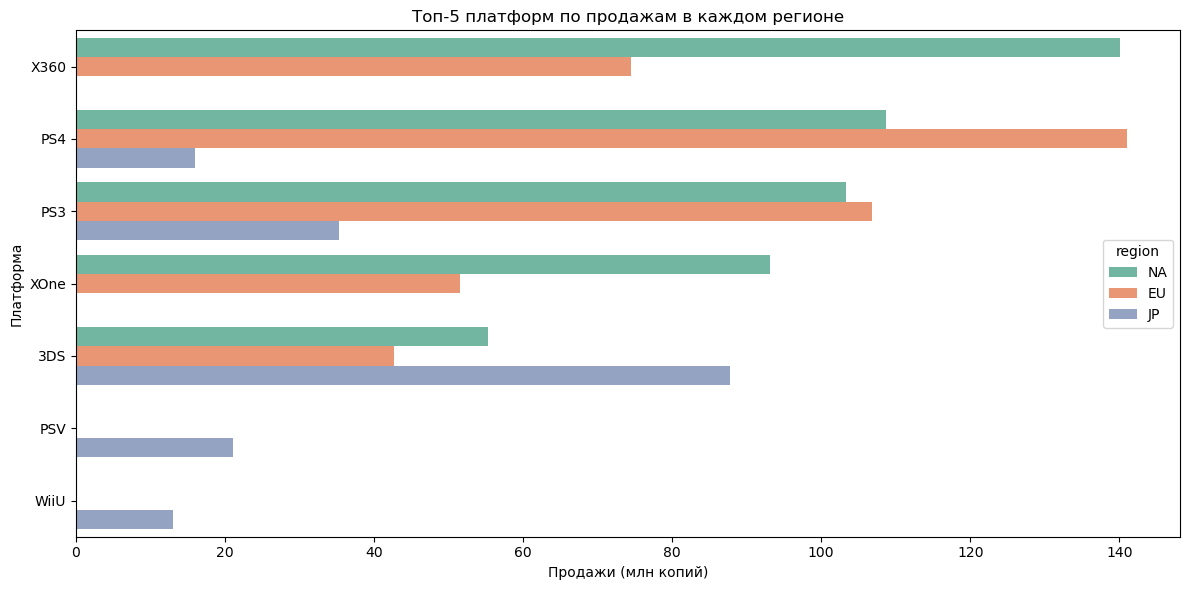

In [29]:
region_sales = filtered_data_by_years.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_na = region_sales.sort_values('na_sales', ascending=False).head(5).reset_index()[['platform', 'na_sales']]
top_eu = region_sales.sort_values('eu_sales', ascending=False).head(5).reset_index()[['platform', 'eu_sales']]
top_jp = region_sales.sort_values('jp_sales', ascending=False).head(5).reset_index()[['platform', 'jp_sales']]

top_na['region'] = 'NA'
top_eu['region'] = 'EU'
top_jp['region'] = 'JP'

top_na = top_na.rename(columns={'na_sales': 'sales'})
top_eu = top_eu.rename(columns={'eu_sales': 'sales'})
top_jp = top_jp.rename(columns={'jp_sales': 'sales'})

top_all = pd.concat([top_na, top_eu, top_jp])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_all, x='sales', y='platform', hue='region', palette='Set2')
plt.title('Топ-5 платформ по продажам в каждом регионе')
plt.xlabel('Продажи (млн копий)')
plt.ylabel('Платформа')
plt.tight_layout()
plt.show()


- Северная Америка (NA)
Лидирует X360, за ней идут PS4 и PS3 — это указывает на доминирование консолей Microsoft и Sony в этом регионе.
Xbox One (XOne) также имеет высокие продажи — подтверждает популярность бренда Xbox в Северной Америке.
Nintendo 3DS занимает последнее место в топ-5, но всё ещё показывает хорошие результаты.

- Европа (EU)
PS4 — безусловный лидер по продажам, за ней следуют PS3 и X360. Это говорит о сильной позиции Sony в Европе.
XOne также уверенно входит в топ, а Nintendo 3DS замыкает пятёрку.

- Япония (JP)
Nintendo 3DS — абсолютный лидер по продажам. Далее следуют PS3, PS4, PSV (PlayStation Vita) и даже WiiU — это подчёркивает:
большую популярность портативных и Nintendo-ориентированных консолей. Низкий интерес к платформам Microsoft (X360, XOne вообще отсутствуют в топе).

<b>Самые популярные игровые жанры в северной америке, европе и японии</b>

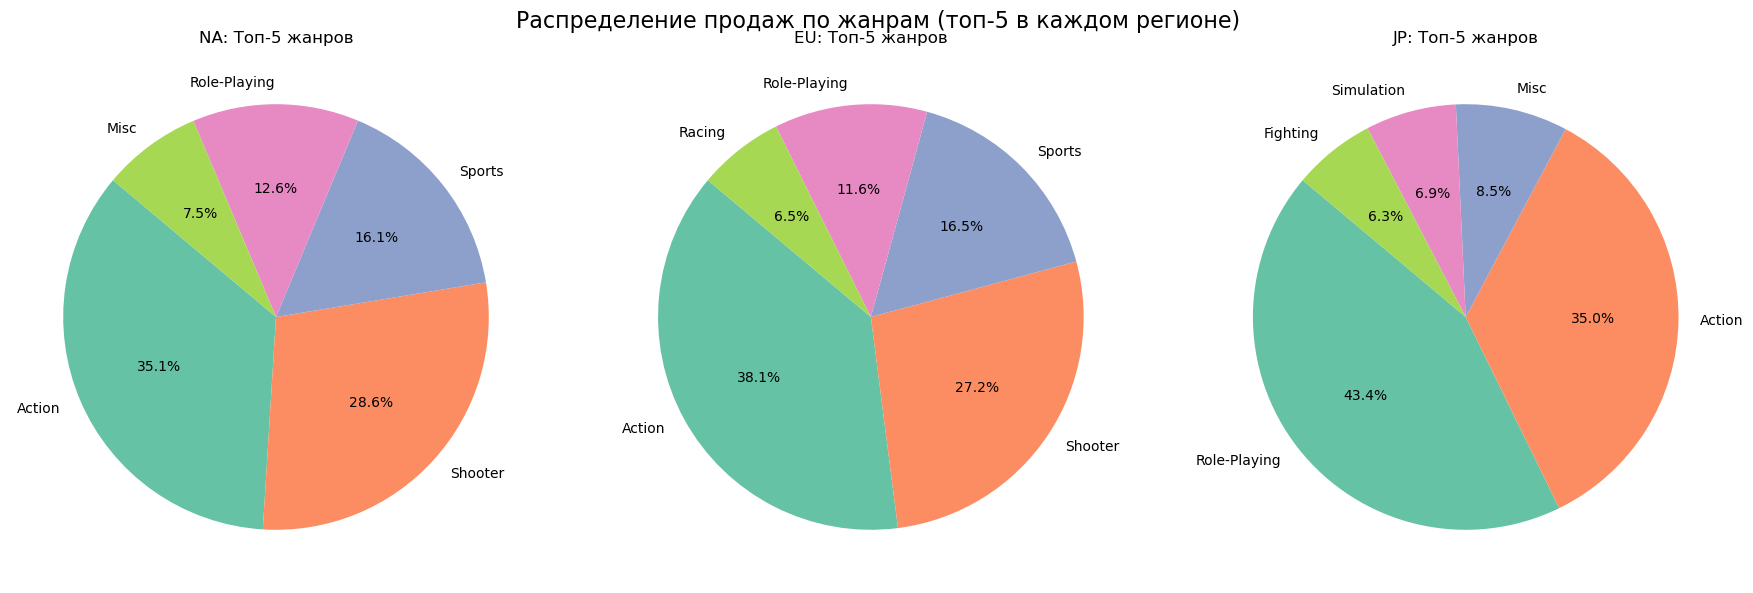

In [30]:
genre_sales = filtered_data_by_years.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Получаем топ-5 жанров отдельно для каждого региона
top_na = genre_sales.sort_values('na_sales', ascending=False).head(5)['na_sales']
top_eu = genre_sales.sort_values('eu_sales', ascending=False).head(5)['eu_sales']
top_jp = genre_sales.sort_values('jp_sales', ascending=False).head(5)['jp_sales']

labels_na = top_na.index.tolist()
labels_eu = top_eu.index.tolist()
labels_jp = top_jp.index.tolist()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# NA
axs[0].pie(top_na, labels=labels_na, autopct='%1.1f%%',
           colors=sns.color_palette('Set2'), startangle=140)
axs[0].set_title('NA: Топ-5 жанров')

# EU
axs[1].pie(top_eu, labels=labels_eu, autopct='%1.1f%%',
           colors=sns.color_palette('Set2'), startangle=140)
axs[1].set_title('EU: Топ-5 жанров')

# JP
axs[2].pie(top_jp, labels=labels_jp, autopct='%1.1f%%',
           colors=sns.color_palette('Set2'), startangle=140)
axs[2].set_title('JP: Топ-5 жанров')

plt.suptitle('Распределение продаж по жанрам (топ-5 в каждом регионе)', fontsize=16)
plt.tight_layout()
plt.show()



- Северная Америка — крупнейший рынок для всех жанров, особенно экшн, спортивные игры и шутеры. 

- Европа показывает аналогичный стабильный интерес к жанрам экшн, спортивные игры и шутеры. 

- В Японии игровые предпочтения отличаются, там популярны ролевые игры и экшн. 

- Следует отметить что жанр экшн доминирующий жанр во всех регионах, особенно в западных.

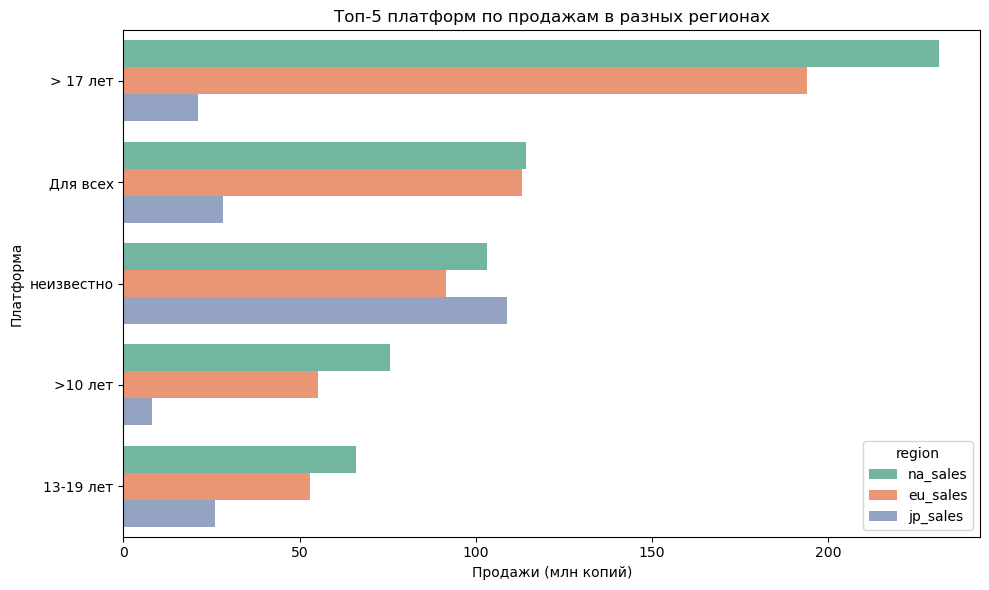

In [31]:
region_sales = filtered_data_by_years.groupby('ESRB_description')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top5_platforms = region_sales.sort_values('na_sales', ascending=False).head(5).reset_index()
top5_long = pd.melt(top5_platforms, id_vars='ESRB_description', value_vars=['na_sales', 'eu_sales', 'jp_sales'],
var_name='region', value_name='sales')

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_long, x='sales', y='ESRB_description', hue='region', palette='Set2')
plt.title('Топ-5 платформ по продажам в разных регионах')
plt.xlabel('Продажи (млн копий)')
plt.ylabel('Платформа')
plt.tight_layout()
plt.show()

- "Для всех":

Безусловный лидер по продажам во всех регионах.

Особенно популярны в Северной Америке.

Европа — на втором месте.

В Японии тоже есть значительный интерес, но в разы меньше.

- "Неизвестно" (игры без указанного рейтинга):

Значительный объём продаж во всех регионах, включая Японию.

Возможно, сюда входят старые игры или инди-проекты.

- "13–19 лет" (Teen):

Популярны в Северной Америке.

Умеренные продажи в Европе.

Незначительный интерес в Японии.

- ">17 лет" (Mature):

Почти такие же продажи, как у Teen-игр.

Европа показывает интерес, но слабее.

В Японии — очень низкий спрос на такие игры (возможно, культурные предпочтения).

- ">10 лет" (E10+):

Существенно меньше продаж, чем у других категорий.

Наименьшая популярность в Японии.

Умеренный спрос в Северной Америке и Европе.

- Игры с рейтингом "Для всех" (E) — самые продаваемые во всех регионах, особенно в Северной Америке. Япония демонстрирует очень ограниченный спрос на игры с рейтингом Teen и Mature. Игры без рейтинга (неизвестно) продаются неожиданно хорошо — это может отражать рынок игр, не попавших под классификацию (например, в Steam или старых платформах). Северная Америка — основной рынок почти для всех возрастных категорий.



<b>Проверка гипотез</b>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b> H0 (нулевая гипотеза) -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; </b>

<b> Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются.</b>

In [32]:
xbox_data = filtered_data_by_years[(filtered_data_by_years['platform']=='XOne') & (filtered_data_by_years['user_score']>0)]['user_score']
pc_data = filtered_data_by_years[(filtered_data_by_years['platform']=='PC') & (filtered_data_by_years['user_score']>0)]['user_score']

alpha = 0.05
stat, p = ttest_ind(xbox_data, pc_data)
print(f"T-статистика: {stat:.3f}")
print(f"P-значение: {p}")

if p < alpha:
    print("Разница статистически значима (отвергаем H0)")
else:
    print("Нет статистически значимой разницы (не отвергаем H0)")

T-статистика: 0.593
P-значение: 0.5535080500643661
Нет статистически значимой разницы (не отвергаем H0)


Значение T-статистики отрицательная (0.593). Это значит, что среднее значение оценки для Xbox One и PC примерно одинаковое.

In [33]:
print('Средняя оценка пользователей игр для платформы Xbox One  {:.2f}'.format(xbox_data.mean()))
print('Средняя оценка пользователей игр для платформы PC {:.2f}'.format(pc_data.mean()))

Средняя оценка пользователей игр для платформы Xbox One  6.52
Средняя оценка пользователей игр для платформы PC 6.43


Анализ показа что средняя оценка в Xbox One и PC почти одинаковы.

<b>Проверка гипотез</b>

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b> H0 (нулевая гипотеза) -  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не отличаются.</b>

<b> Н1 (альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. </b>

In [34]:
action_data = filtered_data_by_years[(filtered_data_by_years['genre']=='Action') & (filtered_data_by_years['user_score']>0)]['user_score']
sports_data = filtered_data_by_years[(filtered_data_by_years['genre']=='Sports') & (filtered_data_by_years['user_score']>0)]['user_score']

alpha = 0.05
stat, p = ttest_ind(action_data, sports_data)
print(f"T-статистика: {stat:.3f}")
print(f"P-значение: {p}")

if p < alpha:
    print("Разница статистически значима (отвергаем H0)")
else:
    print("Нет статистически значимой разницы (не отвергаем H0)")

T-статистика: 10.984
P-значение: 4.8045233804629176e-26
Разница статистически значима (отвергаем H0)


Стат тест показа что между выборками есть статистическое различие. Следовательно мы можем опровергнуть нулевую гипотезу.

In [35]:
print('Средние пользовательские рейтинги жанров Action {:.2f}'.format(action_data.mean()))
print('Средние пользовательские рейтинги жанров Sports {:.2f}'.format(sports_data.mean()))

Средние пользовательские рейтинги жанров Action 6.83
Средние пользовательские рейтинги жанров Sports 5.46


Стат анализ показа что между жанрами Action и Sports есть разница.

<b>Пояснение</b>

Для проверки гипотез о равенстве или различии рейтингов игровых платформ и жанров было решено использовать ttest_ind, так как только он используется для сравнения средних значений двух независимых выборок и проверки, есть ли между ними статистически значимая разница.

Нулевая гипотеза (H0) формулируется как утверждение о том что нет различий между выборками. Она представляет собой нейтральный статус, выражая отсутствия различий. Альтернативная гипотеза (H1) предполагает что есть различие между исследуемыми группами.

<b>Общий вывод.</b>

 <b>Была проведена предобработка данных для анализа игровой индустрии.</b>

- Удалены дубликаты, явные и неявные. 
- Столбцы были переведены в нижний регистр
- Был проведен анализ пропусков в столбцах user_score, rating они были обработаны.
- Добавлен столбец total_sales - общая сумма продаж.
- Обработаны строки с пустыми значениями в столбцах critic_score, user_score.

Исследовательский анализ данных

- По предоставленным данным был проведена визуализация динамики релизов игр с 1980 по 2016 год.
- Визуализирован график показывающий самые популярные игровые платформы.
- Показан жизненный цикл популярных игровых платформ.
- Проведён анализ общих продаж игр в шести самых популярных платформах.
- Проведён анализ и визуализация оценки клиентов и их влияние на общие продажи в трех самых популярных платформах
- Проведён анализ и визуализация оценки критикови их влияние на общие продажи в трех самых популярных платформах
- выведена корреляционная матрица показывающая взаимосвязь между признаками, такими как, общие продажи, оценка критиков, оценка пользователей.
-выведен график показывающий суммарные продажи игр по жанрам, а также график распределения игр по жанрам.
-добавлен столбец с рейтингом игр согласно классификации Entertainment Software Rating Board (ESRB) 
 
Портрет пользователя каждого региона

- Определён портрет пользователея по таким критериям как игровая платформа, жанры игр и влияние рейтинга на продажи. 

Проверьте гипотезы

- был дан однозначный ответ на следующие гипотезы:

1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2)Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проведенный анализ показал наиболее перспективные жанры игр и платформы, при этом следует учесть что игровая платформа все же не вечна и жизненный цикл у них ограничен 10 годами и если разработать игру для платформы чей цикл уже прошел пика, то есть риск потерять прибыль. Рынок мобильных игр начал рости с 2000-ных и достиг пика в 2009-2010 годах, затем пошел спад из за насыщения рынка предложениями.

Самыми перспективными платформами судя по продажам игр являются все модели PS, X360 и , а самыми популярными жарнами являются Action, Sports и Shooter. Предпочтения в платформах и игровых жанрах совпадают в северной америке и европе и сильно отличаются в Японии, данный факт стоит учитывать.

Разные регионы имеют кардинально разные предпочтения:

В северной америке и Европе — предпочитают стационарные консоли от Sony и Microsoft.

В Японии — предпочитает Nintendo и портативные устройства.

Это говорит о важности локальной маркетинговой стратегии и адаптации продукта под культурные и рыночные особенности региона.